In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.transforms as transforms

In [ ]:
df = pd.read_excel('../GC_MS_data/hemp-gcms-selected4-transpose.xlsx')
df

,Type1,Clionasterol,Linoleic acid (omega-6),"Linoleic acid, ethyl ester","Oleic acid, ethyl ester"
0,1,15.35,20.09,0.00,0.00
1,1,0.00,22.93,0.00,0.00
2,1,0.00,35.13,10.36,0.00
3,1,0.00,86.53,0.00,0.00
4,1,0.00,66.24,0.00,0.00
5,1,0.00,34.08,20.61,13.02
6,2,29.07,0.00,0.00,0.00
7,2,0.00,17.63,0.00,0.00
8,2,0.00,15.04,11.49,10.72
9,2,22.32,0.00,0.00,0.00


In [4]:
column_name = df.columns
column_name

Index(['Type1', 'Clionasterol', 'Linoleic acid (omega-6)',
       'Linoleic acid, ethyl ester', 'Oleic acid, ethyl ester'],
      dtype='object')

In [5]:
df_type=df['Type1']
df_type

0     1
1     1
2     1
3     1
4     1
5     1
6     2
7     2
8     2
9     2
10    2
11    2
Name: Type1, dtype: int64

In [6]:
df_features = df.drop('Type1', axis=1)
df_features

,Clionasterol,Linoleic acid (omega-6),"Linoleic acid, ethyl ester","Oleic acid, ethyl ester"
0,15.35,20.09,0.00,0.00
1,0.00,22.93,0.00,0.00
2,0.00,35.13,10.36,0.00
3,0.00,86.53,0.00,0.00
4,0.00,66.24,0.00,0.00
5,0.00,34.08,20.61,13.02
6,29.07,0.00,0.00,0.00
7,0.00,17.63,0.00,0.00
8,0.00,15.04,11.49,10.72
9,22.32,0.00,0.00,0.00


In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)
scaled_data

array([[ 0.85863422, -0.17874035, -0.54070047, -0.44471607],
       [-0.6615544 , -0.07109817, -0.54070047, -0.44471607],
       [-0.6615544 ,  0.3913084 ,  1.04243383, -0.44471607],
       [-0.6615544 ,  2.33948031, -0.54070047, -0.44471607],
       [-0.6615544 ,  1.57044514, -0.54070047, -0.44471607],
       [-0.6615544 ,  0.35151111,  2.6087588 ,  2.48209262],
       [ 2.21739565, -0.9401951 , -0.54070047, -0.44471607],
       [-0.6615544 , -0.27197971, -0.54070047, -0.44471607],
       [-0.6615544 , -0.37014635,  1.21511161,  1.96506804],
       [ 1.5489088 , -0.9401951 , -0.54070047, -0.44471607],
       [ 0.6674965 , -0.9401951 , -0.54070047, -0.44471607],
       [-0.6615544 , -0.9401951 , -0.54070047, -0.44471607]])

In [8]:
pca = PCA(n_components=2)

In [9]:
pca_result = pca.fit_transform(scaled_data)

In [10]:
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [11]:
df_pca['Hemp type'] = df_type
df_pca

,PC1,PC2,Hemp type
0,-1.033882,-0.211711,1
1,-0.306526,0.611465,1
2,0.783774,0.453061,1
3,0.327771,2.343755,1
4,0.125414,1.791111,1
5,3.450673,-1.182474,1
6,-1.859046,-1.425531,2
7,-0.359384,0.467107,2
8,2.104424,-1.071000,2
9,-1.551654,-1.097564,2


In [12]:
def confidence_ellipse(x, y, ax, n_std=2, facecolor='none', edgecolor='black', alpha=0.2, **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    The ellipse is centered at the mean of *x* and *y*.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    
    mean = np.mean(x), np.mean(y)
    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)

    ellipse = Ellipse(xy=mean,
        width=ell_radius_x * n_std * 3,
        height=ell_radius_y * n_std * 3,
        facecolor=color,      # use this instead of color
        edgecolor=color,      # edge outline color
        alpha=alpha,
        **kwargs
    )
    
    angle = np.rad2deg(np.arctan2(*cov[:, 0][::-1]))
    
    
    transf = transforms.Affine2D() \
        .rotate_deg(angle) \
        .translate(mean[0], mean[1])
    
    
    ellipse.set_transform(transf + ax.transData)

    ax.add_patch(ellipse)

In [13]:
def add_jitter(arr, jitter_amount=0.02):
    """Add small random noise to prevent overlap."""
    return arr + np.random.normal(0, jitter_amount, size=arr.shape)

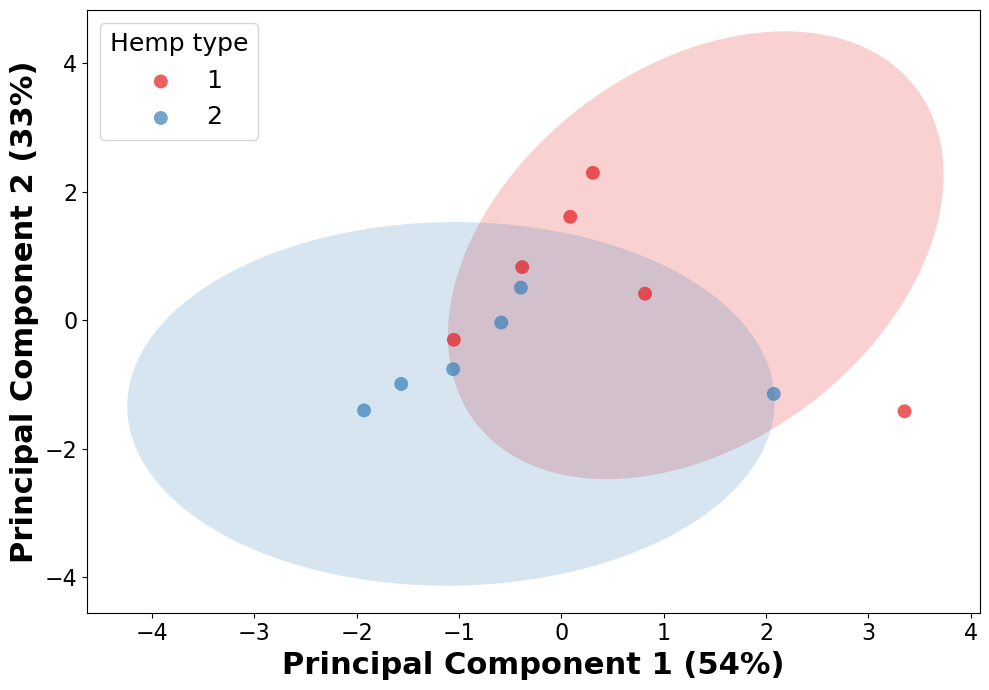

In [14]:
figure = plt.figure(figsize=(10, 7))
axis = figure.add_subplot(111)


colors = sns.color_palette("Set1", len(df_pca['Hemp type'].unique()))


labels = sorted(df_pca['Hemp type'].unique())


for i, label in enumerate(labels):
    color = colors[i]
    subset = df_pca[df_pca['Hemp type'] == label]
    confidence_ellipse(subset['PC1'], subset['PC2'], axis,
                   edgecolor=color, facecolor=color, alpha=0.2, linewidth=0, zorder=0)



for i, label in enumerate(labels):
    color = np.expand_dims(np.array(colors[i]), axis=0)
    subset = df_pca[df_pca['Hemp type'] == label]

    
    pc1_jit = add_jitter(subset['PC1'], jitter_amount=0.1)
    pc2_jit = add_jitter(subset['PC2'], jitter_amount=0.1)

    axis.scatter(pc1_jit, pc2_jit,
                 c=color, alpha=0.7, label=label,
                 edgecolor='none', s=100)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Principal Component 1 (54%)', fontsize=22, fontweight='bold')
plt.ylabel('Principal Component 2 (33%)', fontsize=22, fontweight='bold')
plt.legend(title='Hemp type', fontsize=18, title_fontsize=18)
axis.tick_params(axis='both', labelsize=16) # Set tick label font sizes
plt.grid(False)
plt.tight_layout()
#plt.savefig('rev_fig2right.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)


print("Explained Variance Ratio for each Principal Component:")
print(explained_variance_ratio)

print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance)

Explained Variance Ratio for each Principal Component:
[0.53811439 0.32850147]

Cumulative Explained Variance Ratio:
[0.53811439 0.86661586]


In [16]:
loadings = pca.components_.T  
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=df_features.columns)

print("PCA Loadings:")
print(loadings_df)

PCA Loadings:
                                 PC1       PC2
Clionasterol               -0.459832 -0.490611
Linoleic acid (omega-6)     0.263131  0.718620
Linoleic acid, ethyl ester  0.611841 -0.309954
Oleic acid, ethyl ester     0.587339 -0.383164


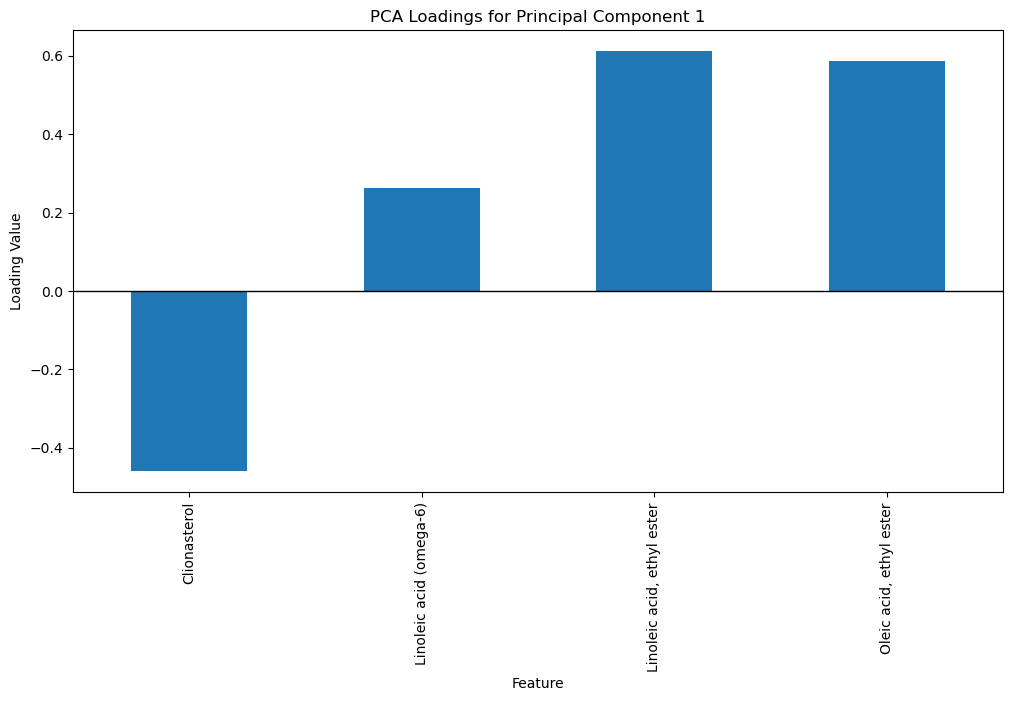

In [17]:
plt.figure(figsize=(12, 6))
loadings_df['PC1'].plot(kind='bar')
plt.title('PCA Loadings for Principal Component 1')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(False)
#plt.savefig('clustermap10p-pca2-loading-pc1.png', dpi=300, bbox_inches='tight')
plt.show()

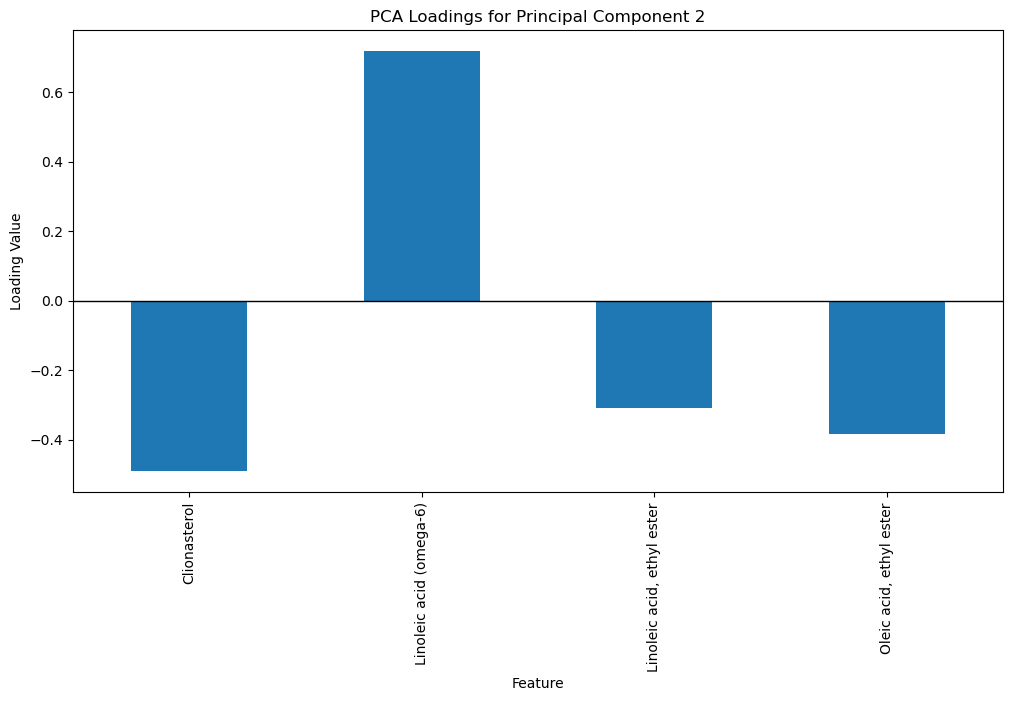

In [18]:
plt.figure(figsize=(12, 6))
loadings_df['PC2'].plot(kind='bar')
plt.title('PCA Loadings for Principal Component 2')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
#plt.savefig('clustermap10p-pca2-loading-pc2.png', dpi=300, bbox_inches='tight')
plt.grid(False)
plt.show()